In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
start_date = '2014-01-01'
end_date = '2018-01-01'
goog_data = yf.download('GOOG', start=start_date,end=end_date, progress=False)

In [3]:
goog_data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
2014-01-09,28.479254,28.498680,28.033922,28.150484,28.150484,83692529
2014-01-10,28.370661,28.370661,27.951481,28.148991,28.148991,86061375
2014-01-13,28.056587,28.565680,27.824955,27.969664,27.969664,97118665
2014-01-14,28.342516,28.667547,28.096935,28.627695,28.627695,99676216


In [4]:
goog_data_signal = pd.DataFrame(index=goog_data.index)

In [5]:
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()

In [6]:
goog_data_signal.head()

,price,daily_difference
Date,,
2014-01-02,27.724083,NaN
2014-01-03,27.521841,-0.202242
2014-01-06,27.828691,0.306850
2014-01-07,28.365179,0.536488
2014-01-08,28.424210,0.059031


In [7]:
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'] = np.where(goog_data_signal['daily_difference'] > 0, 1.0, 0.0)

In [8]:
goog_data_signal.head()

,price,daily_difference,signal
Date,,,
2014-01-02,27.724083,NaN,0.0
2014-01-03,27.521841,-0.202242,0.0
2014-01-06,27.828691,0.306850,1.0
2014-01-07,28.365179,0.536488,1.0
2014-01-08,28.424210,0.059031,1.0


In [9]:
goog_data_signal['positions'] = goog_data_signal['signal'].diff()

In [10]:
goog_data_signal.head(10)

,price,daily_difference,signal,positions
Date,,,,
2014-01-02,27.724083,NaN,0.0,NaN
2014-01-03,27.521841,-0.202242,0.0,0.0
2014-01-06,27.828691,0.306850,1.0,1.0
2014-01-07,28.365179,0.536488,1.0,0.0
2014-01-08,28.424210,0.059031,1.0,0.0
2014-01-09,28.150484,-0.273726,0.0,-1.0
2014-01-10,28.148991,-0.001493,0.0,0.0
2014-01-13,27.969664,-0.179327,0.0,0.0
2014-01-14,28.627695,0.658031,1.0,1.0


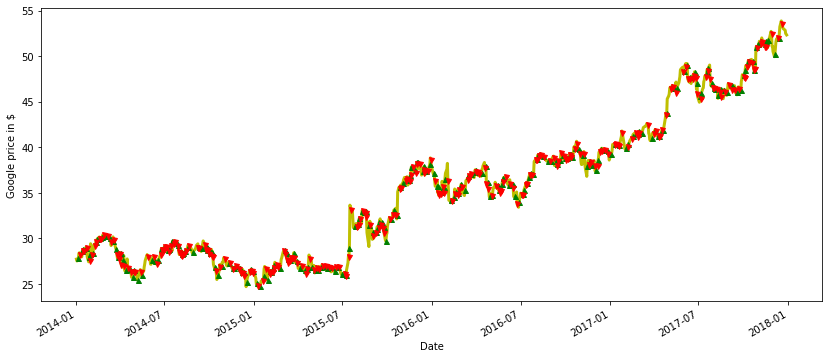

In [11]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='y', lw=3.)

# Buy plot(x,y)
ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='g')
# Sell
ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='r')

plt.show()

In [12]:
goog_data_signal.loc[goog_data_signal.positions == 1.0].index

DatetimeIndex(['2014-01-06', '2014-01-14', '2014-01-16', '2014-01-21',
               '2014-01-28', '2014-01-30', '2014-02-04', '2014-02-11',
               '2014-02-13', '2014-02-20',
               ...
               '2017-10-20', '2017-10-24', '2017-10-27', '2017-11-01',
               '2017-11-07', '2017-11-14', '2017-11-16', '2017-11-21',
               '2017-12-05', '2017-12-13'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

### Backtesting the strategy

In [13]:
# Set the initial capital
initial_capital= float(1000.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

In [14]:
positions

""
Date
2014-01-02
2014-01-03
2014-01-06
2014-01-07
2014-01-08
...
2017-12-22
2017-12-26
2017-12-27


In [15]:
positions['GOOG'] = goog_data_signal['signal']
#  store the amount of the GOOG positions for the portfolio in this one:
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))

In [16]:
positions.head(10)

,GOOG
Date,
2014-01-02,0.0
2014-01-03,0.0
2014-01-06,1.0
2014-01-07,1.0
2014-01-08,1.0
2014-01-09,0.0
2014-01-10,0.0
2014-01-13,0.0
2014-01-14,1.0


In [17]:
portfolio.head(10)

,positions
Date,
2014-01-02,0.000000
2014-01-03,0.000000
2014-01-06,27.828691
2014-01-07,28.365179
2014-01-08,28.424210
2014-01-09,0.000000
2014-01-10,0.000000
2014-01-13,0.000000
2014-01-14,28.627695


In [18]:
# calculate the non-invested money (cash)
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()

In [19]:
portfolio['total'] = portfolio['positions'] + portfolio['cash']

In [20]:
portfolio

,positions,cash,total
Date,,,
2014-01-02,0.000000,NaN,NaN
2014-01-03,0.000000,1000.000000,1000.000000
2014-01-06,27.828691,972.171309,1000.000000
2014-01-07,28.365179,972.171309,1000.536488
2014-01-08,28.424210,972.171309,1000.595518
...,...,...,...
2017-12-22,0.000000,1012.663876,1012.663876
2017-12-26,0.000000,1012.663876,1012.663876
2017-12-27,0.000000,1012.663876,1012.663876


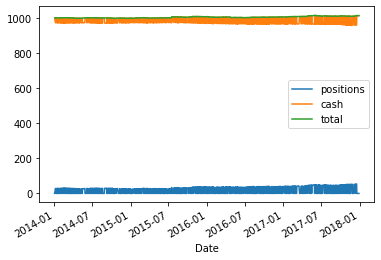

In [21]:
portfolio.plot()
plt.show()

In [23]:
(positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()

,GOOG
Date,
2014-01-02,NaN
2014-01-03,0.000000
2014-01-06,27.828691
2014-01-07,27.828691
2014-01-08,27.828691
...,...
2017-12-22,-12.663876
2017-12-26,-12.663876
2017-12-27,-12.663876
